### Importing libraries

In [284]:
import pandas as pd
import os

In [285]:
df1=pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Merging 12 files months data into 1 file

In [286]:
files=[file for file in os.listdir('./Sales_Data')]
for file in files:
  print(file)



Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [287]:
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])


In [288]:
all_months_data.to_csv("all_data.csv",index=False)

In [289]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Clean up the data
The first step in this is figuring out what we need to clean. 


#### Drop rows of NaN

In [290]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Question 1: What was the best month for sales? How much was earned that month?

In [292]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04



#Find 'Or' and delete it

In [293]:
temp_data = all_data[all_data['Order Date'].str[0:2]=='Or']
temp_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [294]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']


Finding the type of the columns

In [295]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


 from above we can see that all columns types are objects

In [297]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])#make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])#make float

In [298]:
#converting Month column to int type

In [299]:

all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Adding new column sales 

In [300]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [302]:
results=all_data.groupby(['Month']).sum()

results

C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\1522443984.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


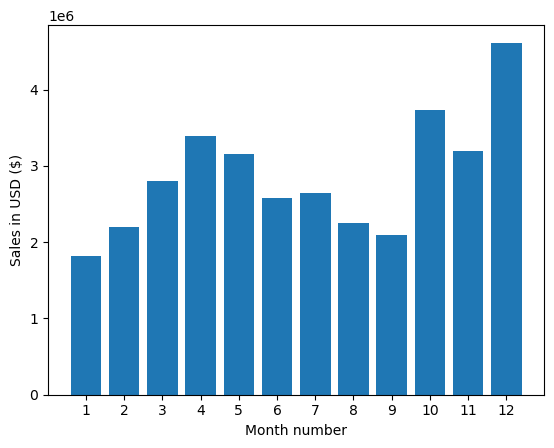

In [303]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results['Sales'] )
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Answer: Best Month for sales was December, Amount earned was 4613443.34 

#### Question 2: What city sold the most product?

Add city column

In [304]:
all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+  x.split(',')[2].split(" ")[1] )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [306]:
city_results=all_data.groupby(['City']).sum()
city_results


C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\446264389.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_results=all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\616765836.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  cities = [city for city, df in all_data.groupby(['City'])]


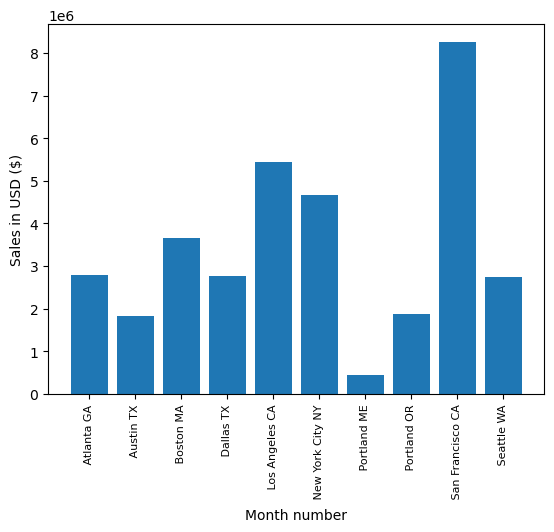

In [307]:

cities = [city for city, df in all_data.groupby(['City'])]

plt.bar(cities,city_results['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()

#### Answer: San Francisco CA has most of the sales 

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [309]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,1
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,1


In [310]:
all_data.groupby(['Hour']).count()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\2891002684.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


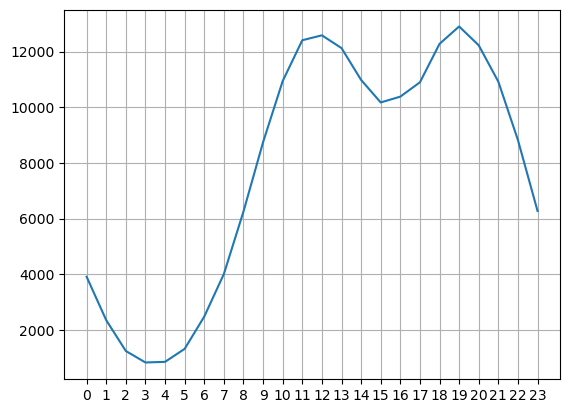

In [215]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

#### Answer : slightly before 11am or 7pm

#### Question 4: What products are most often sold together?

In [221]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df
#This finds the rows in the data frame where there exist duplicates 
#The keep=False tells the duplicated function to mark all duplicate rows as True

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1
17,176574,Google Phone,1,600.00,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,1
18,176574,USB-C Charging Cable,1,11.95,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,1
29,176585,Bose SoundSport Headphones,1,99.99,04-07-2019 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186791,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20,18,1
186802,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,25,1
186803,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0,25,1
186840,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13,49,1


In [231]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df

#transform which will return data aligned to the original df 

C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\992101497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,04-07-2019 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186791,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20,18,1,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186802,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,25,1,"Wired Headphones,AAA Batteries (4-pack)"
186803,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0,25,1,"Wired Headphones,AAA Batteries (4-pack)"
186840,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13,49,1,"Google Phone,USB-C Charging Cable"


In [232]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186780,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186782,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186790,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186802,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [233]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

In [237]:
count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))  #3 here is we need 3 things brought together.If we add 2 den two things brought together
print(count)


Counter({('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87, ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62, ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 47, ('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 35, ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 33, ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 27, ('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 24, ('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 16, ('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 5, ('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'): 4, ('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 3, ('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'): 3, ('iPhone', 'Lightning Charging Cable', 'AA Batteries (4

In [238]:
for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### Answer: 'Google Phone', 'USB-C Charging Cable', 'Wired Headphones' are brought together

#### Question 5: What product sold the most? Why do you think it sold the most?

In [248]:
product_data=all_data.groupby(['Product'])
product_data1=all_data.groupby(['Product']).sum()
product_data1


C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\2622574073.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_data1=all_data.groupby(['Product']).sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,13325
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800


In [250]:
quantity_ordered=product_data1['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\2864129750.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  key=[product for product, x in product_data]


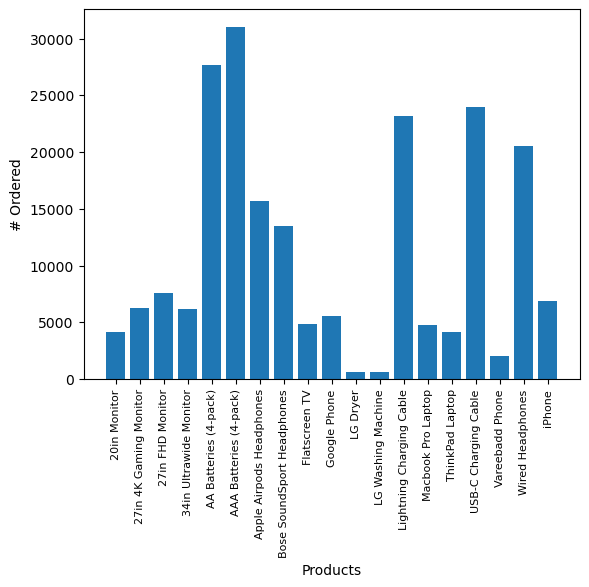

In [265]:
key=[product for product, x in product_data]
plt.bar(key,quantity_ordered)
plt.ylabel('# Ordered')
plt.xlabel('Products')
plt.xticks(key, rotation='vertical', size=8)
plt.show()



In [266]:
prices = all_data.groupby('Product').mean()['Price Each']
prices


C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\2384642851.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\2750576057.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  key=[product for product, x in product_data]
C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\2750576057.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation='vertical',size=8)
C:\Users\Prajyoti Patekar\AppData\Local\Temp\ipykernel_21252\2750576057.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


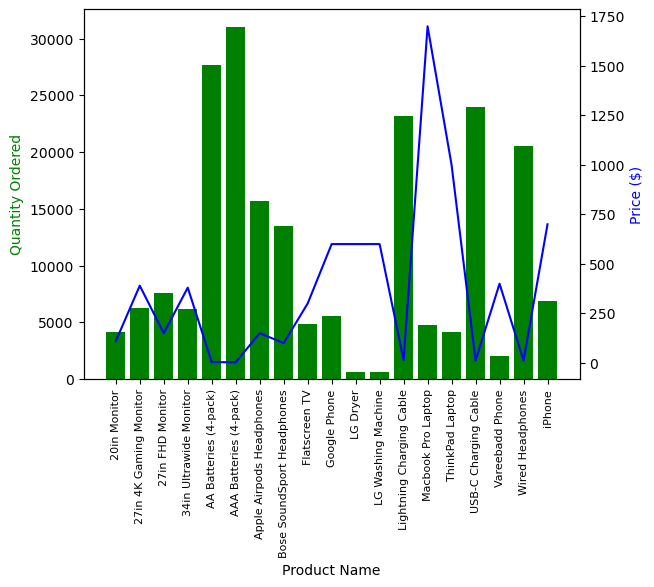

In [280]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
key=[product for product, x in product_data]
ax1.bar(key, quantity_ordered, color='g')
ax2.plot(key, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(key, rotation='vertical',size=8)

fig.show()

#### Answer: As seen in the above chart, as the prices are low the product sold is more .Hence it canm be one of the reasons why AAA Batteries (4-pack) are sold more